# Programa de capacitação

**Introdução à comunicações digitais**

Adolfo Fernandes Herbster

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2019

In [1]:
%matplotlib inline
import numpy as num
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import signal
import scipy.integrate as integrate

In [2]:
def dft(xn, fftLen=None):
    if fftLen is None:
        fftLen = len(xn)
    return num.fft.fftshift(num.fft.fft(xn, fftLen))

In [3]:
Fs = 50 # frequência de amostragem
f0 = 2  # frequência do sinal
T = 0.8 # tempo da janela
t = num.arange(0, T, 1/Fs) # vetor com a taxa de amostragem Fs
cos_t = num.cos(2*num.pi*f0*t)  # gera o sinal com taxa de amostragem Fs

t_long = num.arange(-1, 2, 1/Fs) 
cos_tlong = num.cos(2*num.pi*f0*t_long)

t_fine = num.arange(0, T, 1/(100*Fs)) # vetor com taxa de amostragem 100*Fs
cos_tfine = num.cos(2*num.pi*f0*t_fine) # gera o sinal com taxa de amostragem 100*Fs

N = len(t)
f = num.arange(-Fs/2, Fs/2, Fs/N)

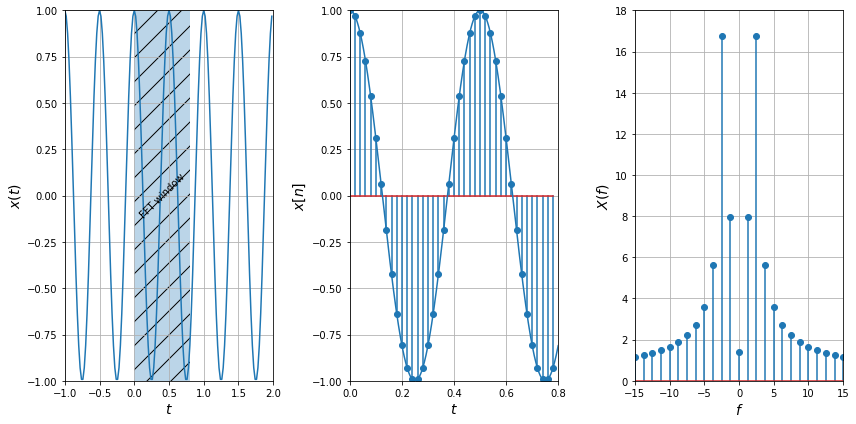

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.plot(t_long, cos_tlong)
plt.gca().add_patch(patches.Rectangle((0, -1), T, 2, hatch='/', alpha=0.3))
plt.text(T/2, 0, "FFT window", ha='center', va='center', rotation=45)
plt.xlim((-1, 2));
plt.ylim((-1, 1));
plt.xlabel('$t$', fontsize = 14); 
plt.ylabel('$x(t)$', fontsize = 14); 
plt.grid(True);

plt.subplot(132)
plt.stem(t, cos_t)
plt.plot(t_fine, cos_tfine)
plt.xlim((0, 0.8));
plt.ylim((-1, 1));
plt.xlabel('$t$', fontsize = 14); 
plt.ylabel('$x[n]$', fontsize = 14); 
plt.grid(True);

plt.subplot(133)
plt.stem(f, abs(dft(cos_t)))
plt.xlabel('$f$', fontsize = 14); 
plt.ylabel('$X(f)$', fontsize = 14); 
plt.grid(True);
plt.xlim((-15, 15));
plt.ylim((0, 18));
plt.tight_layout();

## Não estamos esperando energia apenas na componente $f = 2$ Hz?

In [5]:
print (num.round(f[N//2:N//2+10], 3))

[ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.   11.25]


## A transformada discreta de Fourier assume que o sinal de entrada é um período de um sinal periódico. Sua saída são frequências discretas do sinal periódico.

A transformada considera que o sinal de entrada tem a seguinte forma:

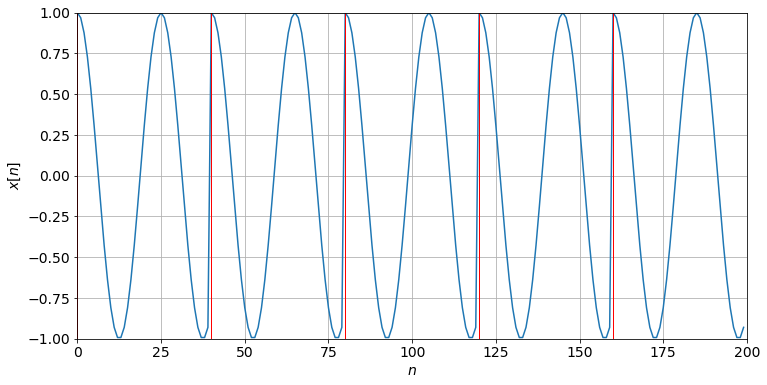

In [6]:
dft_assumed = num.hstack([cos_t]*5)
plt.figure(figsize=(12,6))
plt.plot(dft_assumed);
plt.grid(True);
plt.ylim((-1, 1));
plt.xlim((0, 200));
for n in range(5):
    plt.axvline(n*N, lw=1, color='red')
plt.xlabel('$n$', fontsize = 14); 
plt.ylabel('$x[n]$', fontsize = 14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

Podemos observar que o sinal anterior não é apenas uma função $\cos(x)$. Na verdade, trata-se de um sinal com variações abruptas. Este resultado é conhecido como vazamento espectral (**spectral leakage**).

No caso de medirmos exatamente um múltiplo inteiro do período do sinal, o vazamento espectral desaparecerá, porque a DFT vê um sinal puramente periódico neste caso:

In [7]:
T = 1; 
N = Fs*T;
t = num.arange(0,T,1/Fs)
cos_t = num.cos(2*num.pi*f0*t)
f = num.arange(-Fs/2, Fs/2, Fs/N)

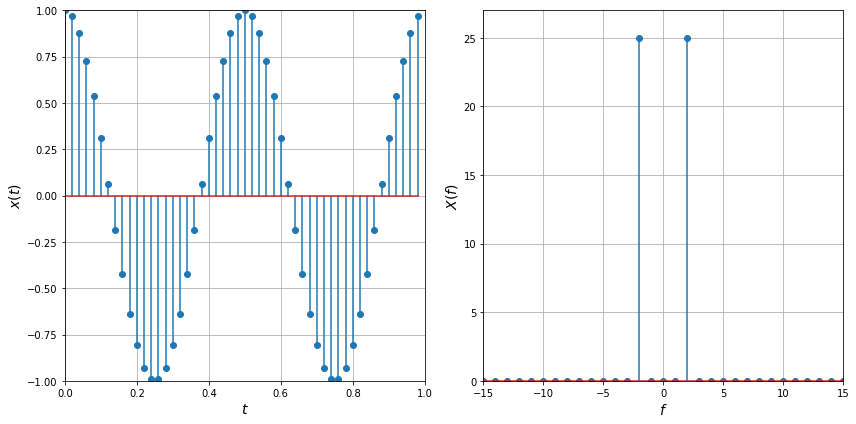

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.stem(t, cos_t);
plt.xlabel('$t$', fontsize = 14);
plt.ylabel('$x(t)$',fontsize = 14);
plt.grid(True);
plt.xlim((0, 1.0));
plt.ylim((-1, 1));

plt.subplot(122)
plt.stem(f, abs(dft(cos_t)))
plt.xlabel('$f$', fontsize = 14); 
plt.ylabel('$X(f)$', fontsize = 14); 
plt.grid(True);
plt.xlim((-15, 15));
plt.ylim((0, 27));
plt.tight_layout();

A transformada de um sinal periódico é um espectro discreto. Mas, se multiplicarmos o sinal periódico por uma janela retangular, o espectro se torna contínuo, pois é a convolução do espectro discreto com uma função $sinc$ (originada da multiplicação com a janela retangular no domínio do tempo). Vamos fazer isso novamente com o nosso exemplo anterior, mas usando a transformada de Fourier desta vez:

In [9]:
def cft(g, f):
    """Avaliação numérica da transformada de Fourier de g para determinadas frequências"""    
    result = num.zeros(len(f), dtype=complex)
    
    # Laço em todas as frequências com cálculo do valor da integral
    for i, ff in enumerate(f):
        # Avalia a transformada de Fourier para uma frequência ff, 
        # assumindo que a função de limitada no tempo abs(t)<5
        result[i] = complex_quad(lambda t: g(t)*num.exp(-2j*num.pi*ff*t), -10, 10)
    return result

def complex_quad(g, a, b):
    """Retorna a integral definida do valor complexo de g de a até b, 
    utilizando a regra de Simpson"""
    # 2501: Número de amostras utilizadas para a avaliação.
    t = num.linspace(a, b, 2501)  
    x = g(t)
    return integrate.simps(y=x, x=t)

In [10]:
T = 0.8;
Fs = 50;
f0 = 2;
cos_fn = lambda t: num.cos(2*num.pi*f0*t);
periodic_cos_fn = lambda t: cos_fn(num.mod(t, T));
windowed_cos_fn = lambda t: cos_fn(t) * ((abs(t-T/2) <= T/2).astype(float));

t = num.arange(-2, 4, 1/Fs);
f = num.arange(-5, 5, 1/20);

X_periodic = cft(periodic_cos_fn, f);
X_windowed = cft(windowed_cos_fn, f)*20/0.8;

def rect(t, tau):
    return (abs(t)<tau).astype(float)

window = lambda t: rect((t-.4), 0.4);

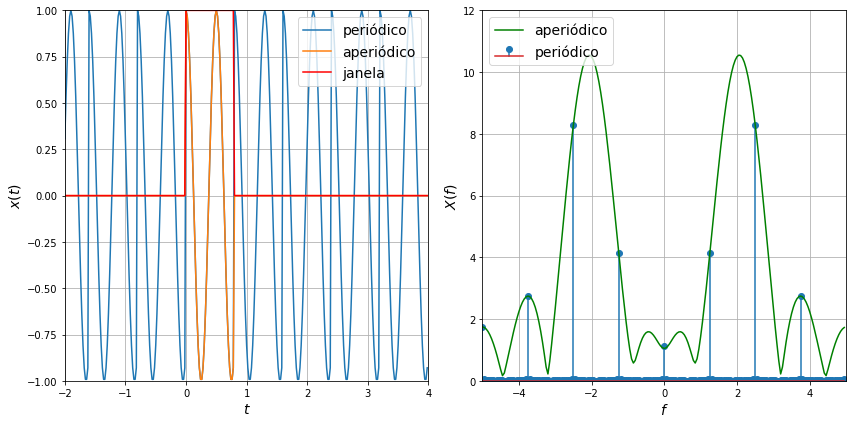

In [11]:
plt.figure(figsize=(12,6));
plt.subplot(121);
plt.plot(t, periodic_cos_fn(t), label='periódico');
plt.plot(t, windowed_cos_fn(t), label='aperiódico');
plt.plot(t, window(t), 'r-', label = 'janela');
plt.xlabel('$t$', fontsize = 14); 
plt.ylabel('$x(t)$', fontsize = 14); 
plt.grid(True);
plt.xlim((-2,4));
plt.ylim((-1, 1));
plt.legend(fontsize=14);

plt.subplot(122);
plt.stem(f, abs(X_periodic), label='periódico');
plt.plot(f, abs(X_windowed), 'g', label='aperiódico');
plt.xlabel('$f$', fontsize = 14); 
plt.ylabel('$X(f)$', fontsize = 14); 
plt.grid(True);
plt.xlim((-5,5));
plt.ylim((0, 12));
plt.tight_layout();
plt.legend(fontsize=14, loc='upper left');

O espectro verde, correspondente à função de janela, mostra seu máximo na freqüência correta $f_0 = 2$ Hz. Isto significa que, mesmo que a DFT (Discrete Fourier Transform) não pudesse dizer exatamente qual a frequência do sinal de janela, o CTFT (Continuous Time Fourier Transform) pode dizer-nos. Podemos também usar o DFT para descobrir essa informação? Sim, podemos - preenchendo com valores nulos o sinal (zero-padding - ZP).

In [12]:
T  = 0.8; 
Fs = 50;
f0 = 2;
t = num.arange(0, T, 1/Fs);
N = len(t);
f = num.arange(-Fs/2, Fs/2, Fs/N);
N_zp = 7*N
cos_t = num.cos(2*num.pi*f0*t);
zero_padded_cos_t = num.hstack([cos_t, num.zeros(N_zp)]);
N_fft = len(zero_padded_cos_t);
f_zp = num.arange(-Fs/2, Fs/2, Fs/N_fft);

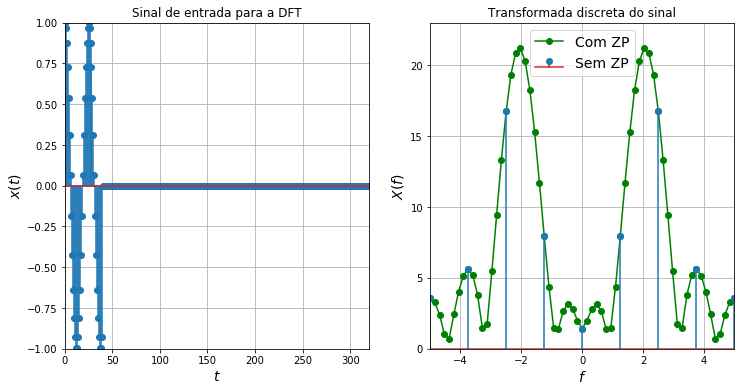

In [13]:
plt.figure(figsize=(12,6));
plt.subplot(121);
plt.stem(zero_padded_cos_t);
plt.title('Sinal de entrada para a DFT');
plt.grid(True);
plt.ylim((-1,1));
plt.xlim((0,N_zp+N));
plt.xlabel('$t$', fontsize = 14); 
plt.ylabel('$x(t)$', fontsize = 14); 

plt.subplot(122);
plt.plot(f_zp, abs(dft(zero_padded_cos_t)), 'g-o', label='Com ZP');
plt.stem(f, abs(dft(cos_t)), label='Sem ZP');
plt.xlim((-5,5));
plt.grid(True);
plt.legend(fontsize=14);
plt.title('Transformada discreta do sinal');
plt.xlabel('$f$', fontsize = 14); 
plt.ylabel('$X(f)$', fontsize = 14); 
plt.ylim((0, 23));

Aqui, fizemos o preenchimento zero adicionando $ 7N $ zeros ao sinal de janela. Consequentemente, a distância entre dois compartimentos de frequência adjacentes torna-se $ F_s / (8N) $, uma vez que o sinal de entrada DFT tem agora um comprimento de amostras de $ 8N $. Olhando para a figura, também a DFT pode nos dizer qual foi a frequência do sinal original: $f_0 = 2$ Hz, já que o máximo da curva verde ocorre em 2Hz. Neste processo, realizamos um processo de interpolação, melhorando a precisão da transformada discreta.

Vamos considerar agora um sinal com dois tons:

In [14]:
Fs = 50;
f0 = 2;
f1 = 2.3;
T = 10;
t = num.arange(0, T, 1/Fs);
x = lambda t: num.cos(2*num.pi*f0*t) + num.cos(2*num.pi*f1*t);

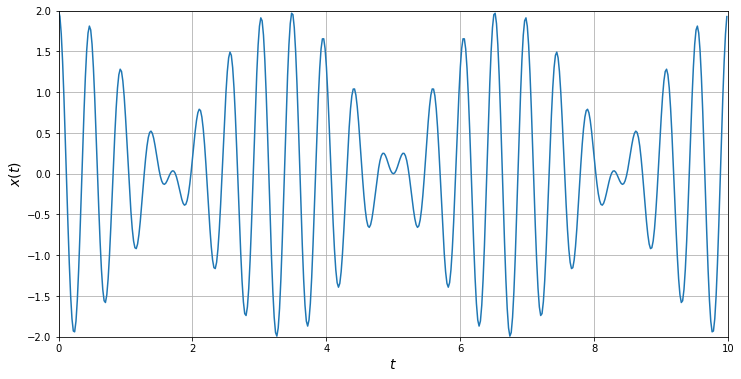

In [21]:
plt.figure(figsize=(12,6));
plt.plot(t, x(t));
plt.xlabel('$t$', fontsize = 14);
plt.ylabel('$x(t)$', fontsize = 14);
plt.xlim((0, 10));
plt.ylim((-2, 2));
plt.grid();

Vamos considerar apenas uma janela de tempo $T = 1$s e verificar a transformada discreta deste sinal:

In [16]:
T = 1; 
N = Fs*T;
t = num.arange(0, T, 1/Fs);
f = num.arange(-Fs/2, Fs/2, Fs/N);

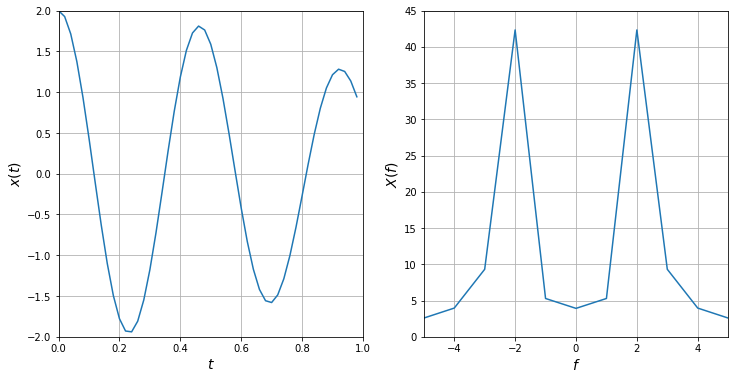

In [17]:
plt.figure(figsize=(12,6));
plt.subplot(121);
plt.plot(t, x(t));
plt.xlabel('$t$', fontsize = 14); 
plt.ylabel('$x(t)$', fontsize = 14); 
plt.grid(True);
plt.xlim((0,1));
plt.ylim((-2, 2));

plt.subplot(122);
plt.plot(f, abs(dft(x(t))));
plt.xlim((-5,5));
plt.xlabel('$f$', fontsize = 14);
plt.ylabel('$X(f)$', fontsize = 14);
plt.grid(True);
plt.ylim((0, 45));

Podemos observar que ainda não temos as duas componentes $f_0$ e $f_1$. Neste caso, adicionamos pontos nulos ao sinal.

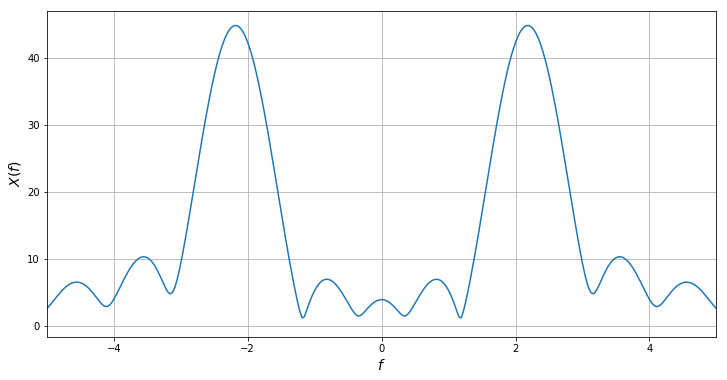

In [18]:
f_zp = num.arange(-Fs/2, Fs/2, Fs/(32*N));
plt.figure(figsize=(12,6));
plt.plot(f_zp, abs(dft(x(t), 32*N)));
plt.xlim((-5,5));
plt.xlabel('$f$', fontsize = 14);
plt.ylabel('$X(f)$', fontsize = 14);
plt.grid(True)

Aparentemente, também com preenchimento com zero (ZP), não podemos distinguir as duas frequências. A estimativa seria que o sinal consiste em um tom com $f = 2,2$ Hz. Isso está de acordo com a afirmação de que o ZP não revela informações extras do espectro. Em vez disso, ele simplesmente interpola o espectro grosseiro para se tornar mais suave. Não ajuda a distinguir entre duas frequências próximas.

Então, como podemos melhorar a exatidão da nossa DFT? Sabemos que a exatidão da DFT é determinada pelo comprimento do sinal gravado: quanto mais longo o sinal, mais exato será a DFT (em contraste com a precisão obtida ao interpolar com preenchimento por zero). Portanto, a solução é gravar uma parte mais longa do sinal, de forma que ambas as freqüências ocorram em caixas separadas. Vamos medir o sinal com uma duração de 10s:

In [19]:
T = 10;
t = num.arange(0, T, 1/Fs);
N = len(t);
f = num.arange(-Fs/2, Fs/2, Fs/N);

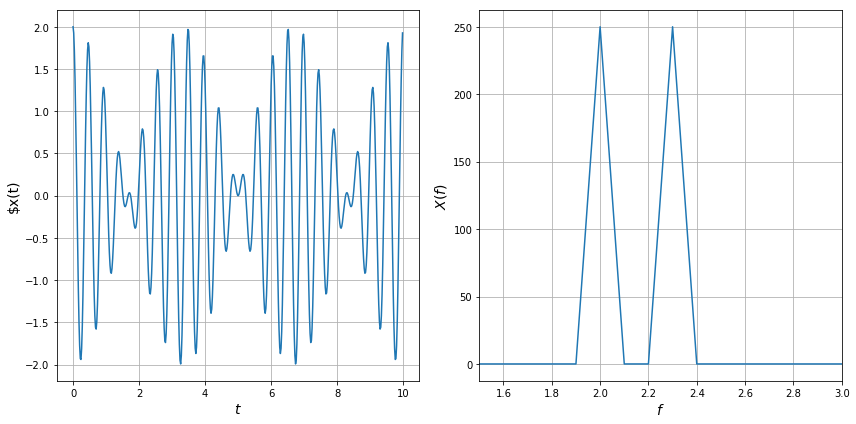

In [23]:
plt.figure(figsize=(12,6));
plt.subplot(121);
plt.plot(t, x(t));
plt.xlabel('$t$', fontsize = 14);
plt.ylabel('$x(t)', fontsize = 14);
plt.grid(True);

plt.subplot(122);
plt.plot(f, abs(dft(x(t))));
plt.xlabel('$f$', fontsize = 14);
plt.ylabel('$X(f)$', fontsize = 14);
plt.grid(True);
plt.xlim((1.5,3));
plt.tight_layout();